## Introduction

Scenario


Instructions


In [77]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, datetime as dt
from scipy import stats

In [133]:
### FIXED PARAMETERS
warm_rate=0.05 # DegC/year
growth_rate=0.05 # %/year
base_death_prob=0.0001 # Proportion (of people impacted who die each hot day, no adaptation)
adapt_death_prob=0.00005 # Proportion (of people impacted who die, with adaptation)
critical_temp=35 # DegC
nyrs=50 # Years to simulate
base_stdv=6.5 # DegC

In [134]:
### CHANGE THE VALUE BELOW TO REFLECT A DIFFERENT BASELINE MEAN TEMP
base_mean_temp=12.# DegC

### CHANGE THE VALUE BELOW TO REFLECT A DIFFERENT BASELINE POPULATION
base_pop=10000000. # People

For starting mean temp (stdev) of 12.0 (6.5) degC, & starting population of 10000000, you saved 23670 lives


Text(0, 0.5, 'Heat deaths/year')

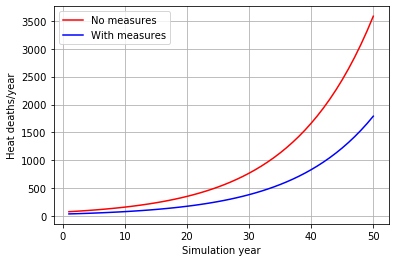

In [142]:
sim_years=np.arange(1,nyrs+1) # Years

# Produce risk scenario, no adaptation
risk_without=np.array([stats.norm.sf(critical_temp,loc=base_mean_temp+warm_rate*i,scale=base_stdv)*365 \
              *base_pop*np.exp(growth_rate*i)*base_death_prob for i in sim_years])

# Produce risk scenario, with adaptation
risk_with=np.array([stats.norm.sf(critical_temp,loc=base_mean_temp+warm_rate*i,scale=base_stdv)*365 \
              *base_pop*np.exp(growth_rate*i)*adapt_death_prob for i in sim_years])

# Compute the cumulative number of lives saved
saved=np.cumsum(risk_without-risk_with)[-1]

# Report
print(r'For starting mean temp (stdev) of %.1f (%.1f) degC, & starting population of %.0f, you saved %.0f lives'\
     %(base_mean_temp,base_stdv,base_pop,saved))

# Plot your scenario
fig,ax=plt.subplots(1,1)
ax.plot(sim_years,risk_without,color='red',label="No measures")
ax.plot(sim_years,risk_with,color='blue',label="With measures")
ax.legend()
ax.grid()
l1=ax.set_xlabel("Simulation year")
l2=ax.set_ylabel("Heat deaths/year")

In [161]:
tscens=np.linspace(10,20,50)
popscens=np.linspace(100000,30000000,50)
out=np.zeros((len(tscens),len(popscens)))
for t in range(len(tscens)):
    for p in range(len(popscens)):
        
        # Produce risk scenario, no adaptation
        risk_without=np.array([stats.norm.sf(critical_temp,loc=tscens[t]+warm_rate*i,scale=base_stdv)*365 \
              *popscens[p]*np.exp(growth_rate*i)*base_death_prob for i in sim_years])

        # Produce risk scenario, with adaptation
        risk_without=np.array([stats.norm.sf(critical_temp,loc=tscens[t]+warm_rate*i,scale=base_stdv)*365 \
              *popscens[p]*np.exp(growth_rate*i)*adapt_death_prob for i in sim_years])

        # Compute the cumulative number of lives saved
        out[t,p]=np.cumsum(risk_without-risk_with)[-1]

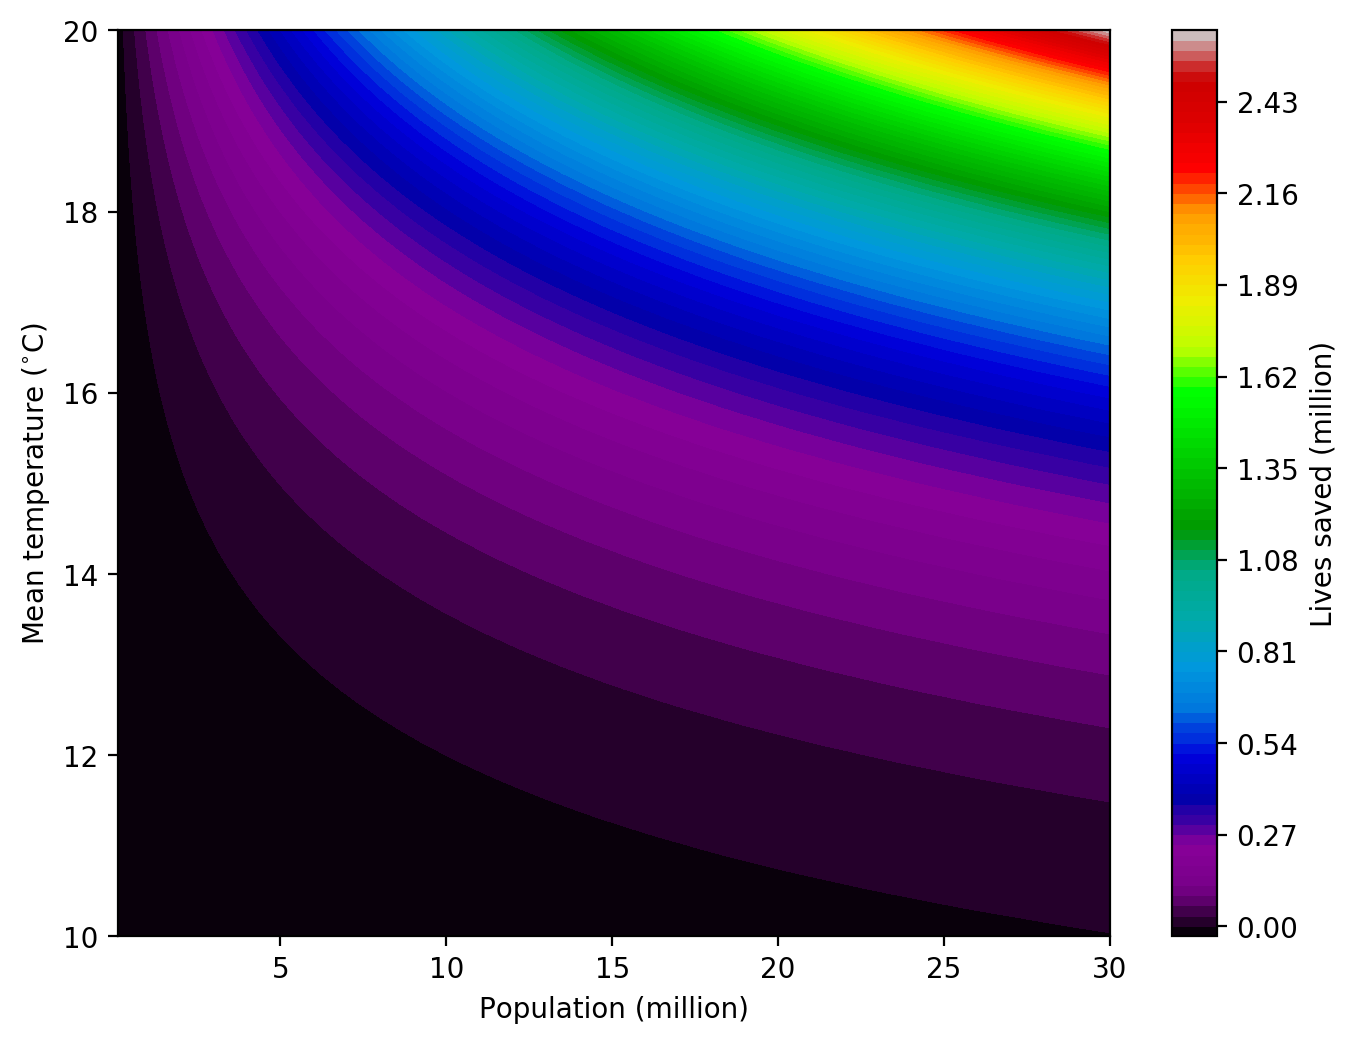

In [168]:
fig,ax=plt.subplots(1,1)
fig.set_size_inches(8,6)
fig.set_dpi(200)
h1=ax.contourf(popscens/1e6,tscens,out/1e6,cmap="nipy_spectral",levels=100)
ax.set_xlabel("Population (million)")
ax.set_ylabel("Mean temperature ($^{\circ}$C)")
fig.colorbar(h1,label="Lives saved (million)")

(0, 0.07)

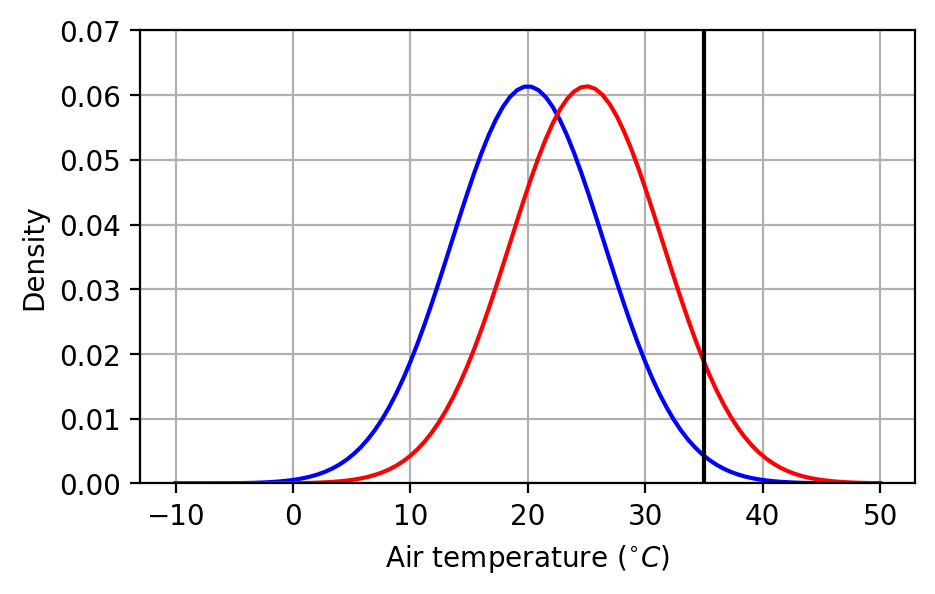

In [181]:
# 
fig,ax=plt.subplots(1,1)
fig.set_size_inches(5,3)
fig.set_dpi(200)
xref=np.linspace(-10,50,100)
cool=stats.norm.pdf(xref,loc=20,scale=base_stdv)
warm=stats.norm.pdf(xref,loc=25,scale=base_stdv)
ax.plot(xref,cool,color='blue')
ax.plot(xref,warm,color='red')
ax.axvline(critical_temp,color='k')
ax.grid()
ax.set_ylabel("Density")
ax.set_xlabel("Air temperature ($^{\circ}C$)")
ax.set_ylim(0,0.07)
